In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

/Users/bjarkehogdall/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


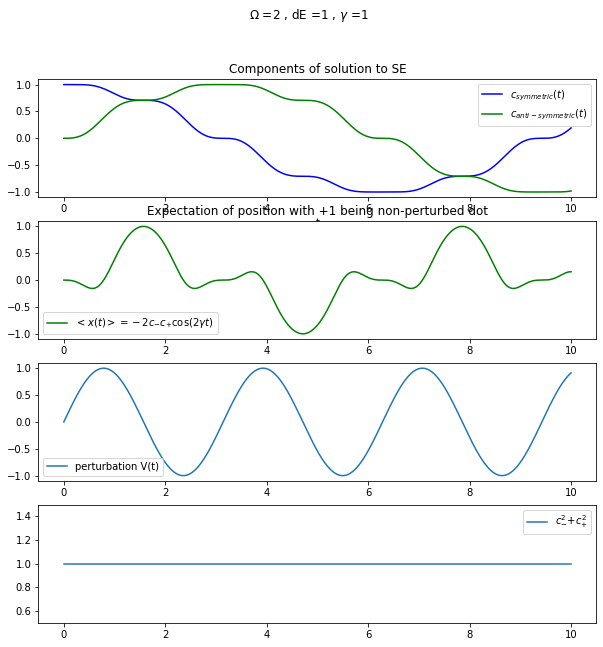

In [69]:
#Oscillating potential

def Ham(y,t,t0,omega,V,gamma):
    c1, c2 = y
    dydt = [-1j*dV*np.heaviside(t-t0,0.5)*np.sin(omega*(t-t0))*(c1+np.exp(-2j*gamma*(t-t0))*c2) , -1j*V*np.heaviside(t-t0,0.5)*np.sin(omega*(t-t0))*(c2+np.exp(+2j*gamma*t)*c1)]
    return dydt

omega = 2
gamma = 1
dV = 1
t0 = 0

y0 = [1,0]

t = np.linspace(0, 10, 1001)



sol = odeint(Ham, y0, t, args=(t0,omega, dV, gamma))

c1 = np.array(sol[:, 0])
c2 = np.array(sol[:, 1])

x = -2*c1*c2*np.cos(2*gamma*t)

fig , axs = plt.subplots(4,figsize=(10,10))
fig.suptitle('$\Omega$ ='+str(omega)+' , dE ='+str(dV)+" , $\gamma$ ="+str(gamma))
axs[0].plot(t, c1, 'b', label='$c_{symmetric} (t)$')
axs[0].plot(t, c2, 'g', label='$c_{anti-symmetric}(t)$')
axs[0].legend(loc='best')
axs[0].set_xlabel('t')
axs[0].set_title('Components of solution to SE')
axs[1].plot(t, x, 'g', label='$<x(t)> = -2 c_{-} c_{+}$cos$(2 \gamma t)$')
axs[1].legend(loc='best')
axs[1].set_title('Expectation of position with +1 being non-perturbed dot')
axs[2].plot(t,dV*np.heaviside(t-t0,0.5)*np.sin(omega*(t-t0)),label='perturbation V(t)')
axs[2].legend(loc='best')
axs[3].plot(t,c1**2+c2**2,label='$c_{-}^2$+$c_{+}^2$')
axs[3].set_ylim([0.5,1.5])
axs[3].legend(loc='best')



In [3]:
#With pulse

def Ham_pulse(y,t,omega,V,gamma,t0,sigma):
    c1, c2 = y   #c1 is symmetric, c2 is assymetric
    dydt = [-1j*V*np.exp(-0.5*((t-t0)/sigma)**2)*np.cos(omega*(t-t0))*(c1+np.exp(-2j*gamma*t)*c2) , -1j*V*np.exp(-0.5*((t-t0)/sigma)**2)*np.cos(omega*(t-t0))*(c2+np.exp(2j*gamma*t)*c1)]
    return dydt


/Users/bjarkehogdall/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


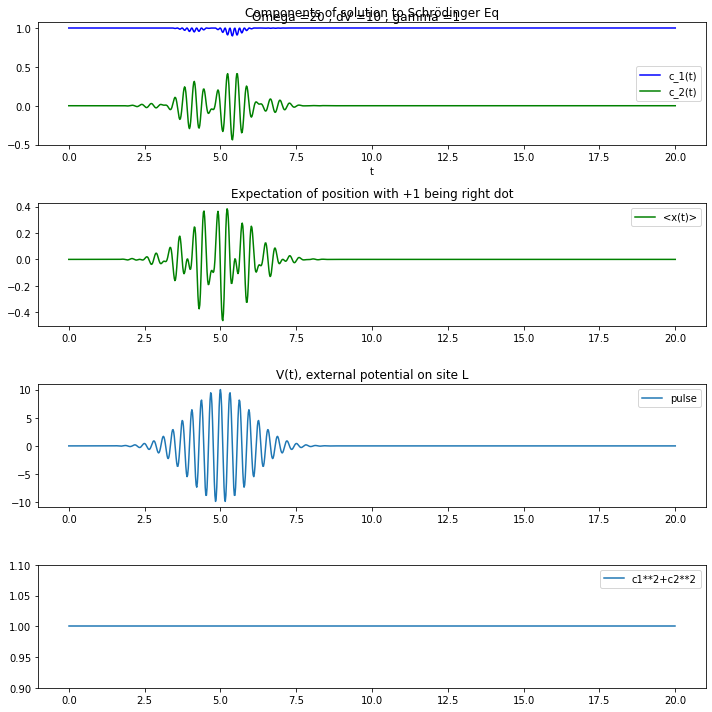

In [51]:
tf = 20
ti = 0
omega = 20
gamma = 1 # = hopping
dV_pulse = 10
t0= 5
sigma=1

y0 = [1,0]

t = np.linspace(ti, tf, 1001)


sol = odeint(Ham_pulse, y0, t, args=(omega, dV_pulse, gamma,t0,sigma))

c1 = np.array(sol[:, 0])
c2 = np.array(sol[:, 1])

x = -2*c1*c2*np.cos(2*gamma*t)

fig , axs = plt.subplots(4,figsize=(10,10))
fig.suptitle('Omega ='+str(omega)+' , dV ='+str(dV_pulse)+" , gamma ="+str(gamma))
axs[0].plot(t, c1, 'b', label='c_1(t)')
axs[0].plot(t, c2, 'g', label='c_2(t)')
axs[0].legend(loc='best')
axs[0].set_xlabel('t')
axs[0].set_title('Components of solution to Schrödinger Eq')
axs[1].plot(t, x, 'g', label='<x(t)>')
axs[1].legend(loc='best')
axs[1].set_title('Expectation of position with +1 being right dot')
axs[2].plot(t,dV_pulse*np.exp( -0.5*((t-t0)/sigma)**2 )*np.cos(omega*(t-t0)),label='pulse')
axs[2].set_title('V(t), external potential on site L')
axs[2].legend(loc='best')
axs[3].plot(t,c1**2+c2**2,label='c1**2+c2**2')
axs[3].set_ylim([0.9,1.1])
axs[3].legend(loc='best')
plt.tight_layout()
plt.show()

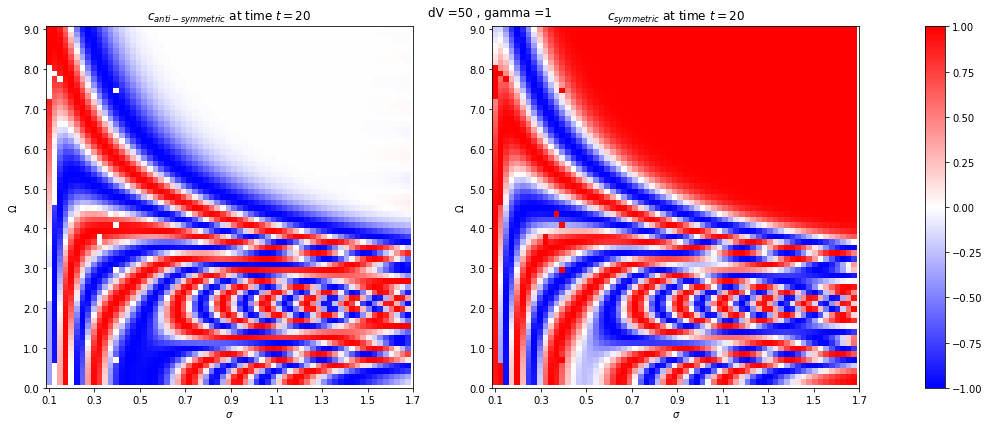

In [30]:
#Pulse phase space

N = 9*7+1    #9*X + 1 , for omega
M = 16*4+1    #16*X + 1 , for sigma
omega_vec = np.linspace(0,9,N)
sigma_vec = np.linspace(0.1,1.7,M)

xticks = np.linspace(0,M,9)
xtick_labels = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7]
yticks = np.linspace(0,N,10)
ytick_labels = np.linspace(9,0,10)

param_space = np.zeros((N,M))
param_spacesym = np.zeros((N,M))


dV2 = 10
gamma2 = 1
y02 = [1,0]
t02 = 5

t2 = np.linspace(0, 20, 101)


for i in range(np.size(omega_vec)):
    for j in range(np.size(sigma_vec)):
        sol_int = odeint(Ham_pulse, y02, t2, args=(omega_vec[i], dV2, gamma2,t0,sigma_vec[j]))
        z = sol_int[-1,1]  #taking the last c_2 value
        z1 = sol_int[-1,0]   #taking last c_1 value
        #print( 1 - sol_int[-1,0]**2 -  sol_int[-1,1]**2)  #Check normalization
        param_space[-i-1,j]=z
        param_spacesym[-i-1,j]=z1


import matplotlib as mpl
fig2 , ax2 = plt.subplots(nrows=1,ncols=3,figsize=(14,6),gridspec_kw={'width_ratios': [10, 10,0.5]})
fig2.suptitle('dV ='+str(dV2)+" , gamma ="+str(gamma2))
img = ax2[0].imshow(param_space,interpolation='none', cmap = 'bwr',vmin=-1,vmax=1)
ax2[0].set_title('$c_{anti-symmetric}$ at time $t=20$')
ax2[0].set_xlabel('$\sigma$')
ax2[0].set_ylabel('$\Omega$')
ax2[0].set_xticks(xticks)
ax2[0].set_xticklabels(xtick_labels)
ax2[0].set_yticks(yticks)
ax2[0].set_yticklabels(ytick_labels)
img2 = ax2[1].imshow(param_spacesym,interpolation='none', cmap = 'bwr',vmin=-1,vmax=1)
ax2[1].set_title('$c_{symmetric}$ at time $t=20$')
ax2[1].set_xlabel('$\sigma$')
ax2[1].set_ylabel('$\Omega$')
ax2[1].set_xticks(xticks)
ax2[1].set_xticklabels(xtick_labels)
ax2[1].set_yticks(yticks)
ax2[1].set_yticklabels(ytick_labels)
plt.colorbar(img, cmap='bwr',shrink=0.1,cax=ax2[2])
plt.tight_layout()
plt.show()


 

In [37]:
#with complex but it is the same

def Ham_c(t,y,omega,V,gamma,t0,sigma):
    c1, c2 = y   #c1 is symmetric, c2 is assymetric
    dydt = [-1j*V*np.exp(-0.5*((t-t0)/sigma)**2)*np.cos(omega*(t-t0))*(c1+np.exp(-2j*gamma*t)*c2) , -1j*V*np.exp(-0.5*((t-t0)/sigma)**2)*np.cos(omega*(t-t0))*(c2+np.exp(2j*gamma*t)*c1)]
    return dydt

y0, t0 = [1.0,0], 0

omega_c = 7
dV_c = 10
gamma_c = 1
sigma_c = 0.8
t0_c = 5

s = complex_ode(Ham_c)
s.set_f_params()
s.set_f_params(omega_c, dV_c, gamma_c,t0_c,sigma_c)
s.set_initial_value(y0,t0)
t1 = 10
dt = 0.01

s.successful()

tplot = []
yplot1 = []
yplot2 = []

while s.successful() and s.t < t1:
    s.integrate(s.t+dt)
#    print(s.t, s.y)
    tplot.append(s.t)
    yplot1.append(s.y[0])
    yplot2.append(s.y[1])

figc , axc = plt.subplots(figsize=(10,5))
axc.plot(tplot,yplot1,label='$c_{symmetric}$')
axc.plot(tplot,yplot2,label='$c_{anti-sym}$')
axc.legend(loc='best')
axc.grid('True')



TypeError: 'int' object is not subscriptable

True


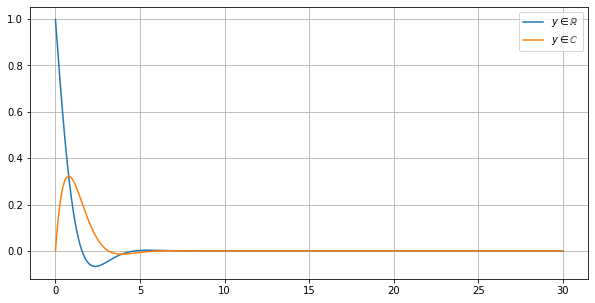

In [46]:
def testfunc(t,y):
    dydt = (1j-1)*y
    return dydt

soltest = complex_ode(testfunc)
soltest.set_f_params()
soltest.set_initial_value(1,0)
t1 = 30
dt = 0.001

print(soltest.successful())

tplottest = []
yplot1test = []
#yplot2test = []

while soltest.successful() and soltest.t < t1:
    soltest.integrate(soltest.t+dt)
#    print(soltest.t, soltest.y)
    tplottest.append(soltest.t)
    yplot1test.append(soltest.y)
#    yplot2test.append(soltest.y[1])


figtest , axtest = plt.subplots(figsize=(10,5))
axtest.plot(tplottest,np.real(yplot1test),label='$y \in \mathbb{R}$')
axtest.plot(tplottest,np.imag(yplot1test),label='$y \in \mathbb{C}$')
axtest.legend(loc='best')
axtest.grid('True')
